# Tarea pandas procesamiento analitico de datos.
Alumno: Rodrigo Dominguez M. Rut: 17.392.282-5

Se recibe un listado de alumnos en el archivo alumnos.xlsx, y se necesita obtener la siguiente
información:

*Cantidad de alumnos matriculados y no matriculados por carrera* &nbsp;&nbsp;&nbsp;&nbsp;<a href='#pregunta1'>ir a la linea de la solución</a>

*Cantidad de alumnos con gratuidad por sexo* &nbsp;&nbsp;&nbsp;&nbsp;<a href='#pregunta2'>ir a la linea de la solución</a>

*Cantidad de alumnos por tipo de ingreso en cada facultad* &nbsp;&nbsp;&nbsp;&nbsp;<a href='#pregunta3'>ir a la linea de la solución</a>

*Cantidad de alumnos titulados según el año de ingreso para alumnos sin gratuidad.* &nbsp;&nbsp;&nbsp;&nbsp;<a href='#pregunta4'>ir a la linea de la solución</a>

*Carrera que tiene más cantidad de mujeres para años de ingresos posteriores al 2010* &nbsp;&nbsp;&nbsp;&nbsp;<a href='#pregunta5'>ir a la linea de la solución</a>

<h1>Configuracion y carga</h1>

*importamos pandas*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

*Cargamos los archivos*

In [2]:
alumnos = pd.ExcelFile('alumnos.xlsx')
facultadCarrera = pd.ExcelFile('facultades_y_carreras.xlsx')
alumnosAntiguo = pd.ExcelFile('alumnos_base_antigua.xlsx')

*creamos los dataframes*

In [3]:
dfAlumnos = alumnos.parse('listado_alumnos')
dfAlumnosAntiguos = alumnosAntiguo.parse('base')
dfFacultades = facultadCarrera.parse('Facultades')
dfCarreras = facultadCarrera.parse('Carreras')

# Desarrollo 1

*Verificamos alumnos sin rut:*

In [4]:
dfAlumnos['Rut'].isnull().sum()

167

*Existen 167 alumnos sin rut, por ende necesitamos recuperar los rut de la base de datos antigua*

*Creamos un nuevo df con el merge de los 2 dataframe de alumnos y alumnos base antigua.*

In [5]:
dfAlumnosTotal = dfAlumnos.merge(dfAlumnosAntiguos,how='left')

*Eliminamos duplicados:*

In [6]:
dfAlumnosTotal.drop(dfAlumnosTotal[dfAlumnosTotal.Rut.duplicated()].index, inplace=True)

*Verificamos alumnos sin rut desde el nuevo dataframe*

In [7]:
dfAlumnosTotal.Rut.isnull().sum()

1

*Solo queda un alumno sin rut. Por ende ese alumno no tiene rut en ninguna de las 2 bases de datos.*

*Realizamos un merge con las carreras para obtener el nombre de la carrera*

In [8]:
dfAlumnosTotal = dfAlumnosTotal.merge(dfCarreras,how='left',left_on='Codigo carrera', right_on='ID carrera')

*Luego, creamos un dataframe <b>cantidadMatric</b> donde almacenamos las columnas de los rut, el nombre de la carrera y la situación de su matricula.*

In [9]:
cantidadMatric = dfAlumnosTotal.iloc[:,[1,16,11]]

In [10]:
cantidadMatric

,Rut,nombre carrera,Situac. Matrícula
0,11389462.0,INGENIERIA CIVIL MECANICA,NO MATRICULADO
1,14355603.0,TRABAJO SOCIAL,NO MATRICULADO
2,21444463.0,QUIMICA,NO MATRICULADO
3,15078886.0,ARQUITECTURA,NO MATRICULADO
4,15426303.0,KINESIOLOGIA,NO MATRICULADO
...,...,...,...
21861,15485097.0,INGENIERIA CIVIL MECANICA,NO MATRICULADO
21862,15154615.0,PSICOPEDAGOGIA,NO MATRICULADO
21863,17392675.0,DERECHO,NO MATRICULADO
21864,21624175.0,INGENIERIA CIVIL EN MINAS,NO MATRICULADO


*Eliminamos de el nuevo df las filas con situacion de maticula = 'PROCESO MATRICULA'*

In [11]:
cantidadMatric = cantidadMatric.drop(cantidadMatric[cantidadMatric['Situac. Matrícula'] == 'PROCESO MATRICULA'].index)

*Verificamos que no queden filas con el dato de 'PROCESO MATRICULA'*

In [12]:
(cantidadMatric['Situac. Matrícula'] == 'PROCESO MATRICULA').sum()

0

<a name='pregunta1'> P1 </a>

*Realizamos un grafico de barras horizontales acumulado, donde se presentan las carreras en el eje Y, la cantidad de alumnos matriculados en el eje X separados por las categorias de 'MATRICULADO' y 'NO MATRICULADO'*



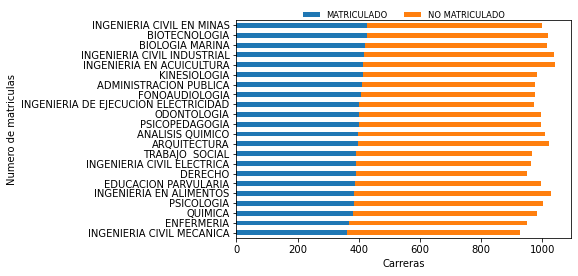

In [57]:
cantidadMatric.groupby(['nombre carrera', 'Situac. Matrícula']).count().Rut.unstack().sort_values('MATRICULADO').plot(kind='barh',stacked=True, legend=False)
plt.xlabel('Carreras')
plt.ylabel('Numero de matriculas')
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.08),fontsize='small', frameon=False)
plt.show()

# Desarrollo 2

*Verificamos los alumnos que no tienen sexo:*

In [54]:
dfAlumnosTotal.Sexo.isin([' ']).sum()

1163

*Existen 1163 Alumnos sin un sexo definido, por ende procedemos a cambiar el dato por no definido:*

In [55]:
dfAlumnosTotal.Sexo.replace({' ':'No definido'},inplace=True)

 <a name='pregunta2'>P2</a>

*Realizamos un grafico de tipo torta con la cantidad de alumnos por beneficio y sexo, luego filtramos solo quienes tienen gratuidad y los mostramos en %*

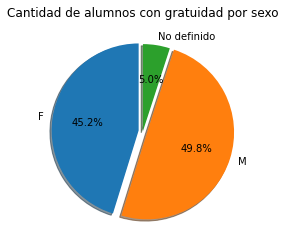

In [58]:
explode = [0.05,0.05,0]
plt.pie(dfAlumnosTotal.groupby(['Beneficio', 'Sexo']).count().Rut.get('Gratuidad').values, labels=dfAlumnosTotal.groupby(['Beneficio', 'Sexo']).count().Rut.get('Gratuidad').index,explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Cantidad de alumnos con gratuidad por sexo')
plt.show()

# Desarrollo 3

*Realizamos un merge con las facultades para obtener el nombre de las facultades*

In [59]:
dfAlumnosTotal = dfAlumnosTotal.merge(dfFacultades,how='left',left_on='id facultad', right_on='id')

<a name='pregunta3'>P3</a>

*Realizamos un grafico de tipo barras verticales con las facultades en el eje X, y la cantidad de alumnos en el eje Y, luego segmentamos los datos segun tipo de ingreso.*

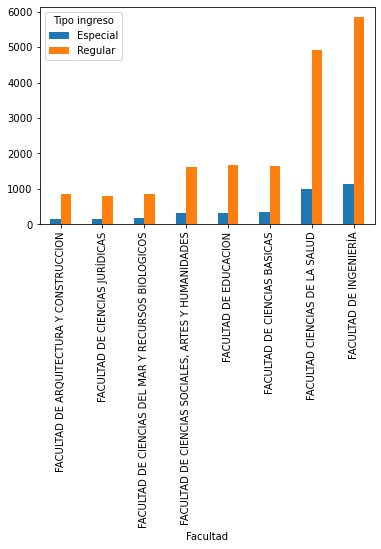

In [70]:
dfAlumnosTotal.groupby(['Facultad', 'Tipo ingreso']).count().Rut.unstack().sort_values('Especial').plot(kind='bar')
plt.show()

# Desarrollo 4

*Reemplazamos los valores NA y espacio por el texto sin gratuidad.*

In [63]:
dfAlumnosTotal.Beneficio.fillna('Sin gratuidad',inplace=True)
dfAlumnosTotal.Beneficio.replace({' ':'Sin gratuidad'},inplace=True)

 <a name='pregunta4'>P4</a>

*Realizamos un grafico de barras con los años ordenados en el eje X y cantidad de alumnos en el eje Y, luego filtramos los alumnos Titulados y sin gratuidad*

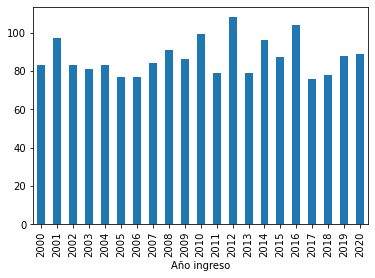

In [73]:
dfAlumnosTotal.groupby(['Alumnos', 'Beneficio','Año ingreso']).count().Rut.get('TITULADO').get('Sin gratuidad').plot(kind='bar')
plt.show()

# Desarrollo 5

*Creamos una variable llamada <b> alumnoIngresoMayor2010 </b> donde se almacena un df con los datos desde 2010 en adelante*

In [74]:
alumnoIngresoMayor2010 = dfAlumnosTotal[dfAlumnosTotal[('Año ingreso')] >2010]

*extraemos del df creado la columna nombre carrera y filtramos por sexo = F*

In [79]:
carrerasMayorIngreso2010 = pd.DataFrame(sorted(alumnoIngresoMayor2010.groupby(['Sexo','nombre carrera']).count().Rut.get('F').items(), key=lambda x: x[1]))

*Renombramos las nuevas columnas para un mejor entendimiento*

In [80]:
carrerasMayorIngreso2010.columns = ['Carrera', 'Cantidad de mujeres']

*Visualizamos el nuevo df*

In [81]:
carrerasMayorIngreso2010

,Carrera,Cantidad de mujeres
0,PSICOLOGIA,186
1,INGENIERIA DE EJECUCION ELECTRICIDAD,204
2,QUIMICA,204
3,INGENIERIA CIVIL ELECTRICA,205
4,PSICOPEDAGOGIA,207
5,INGENIERIA CIVIL MECANICA,210
6,ADMINISTRACION PUBLICA,211
7,FONOAUDIOLOGIA,211
8,ENFERMERIA,212
9,ODONTOLOGIA,216


<a name='pregunta5'>P5</a>

*Realizamos un grafico con el df creado* 

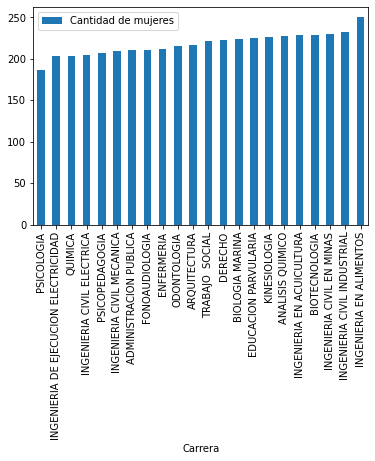

In [83]:
carrerasMayorIngreso2010.groupby('Carrera').mean().sort_values('Cantidad de mujeres').plot(kind='bar')
plt.show()